## C3: Technical Lesson

### Overview ###

Time series data plays a crucial role in understanding patterns, trends, and seasonality in various fields such as finance, healthcare, and climate science. This lesson provides a structured approach to handling time series data, guiding you through essential techniques to import, clean, analyze, and visualize data effectively.

### The Problem: Analyzing Atmospheric CO₂ Trends ###

One major challenge in climate science is tracking and interpreting long-term changes in atmospheric CO₂ levels. Scientists rely on time series data to detect trends, seasonal variations, and anomalies in CO₂ concentrations, which helps in understanding climate change. However, raw data is often messy, contains missing values, and requires transformation before meaningful insights can be extracted.

This lesson covers techniques for importing, cleaning, managing, and visualizing time series data in Python using pandas, matplotlib, and statsmodels. The dataset used in this lab consists of atmospheric CO₂ readings from the Mauna Loa Observatory, spanning from March 1958 to December 2001.

### The Established Process: A Step-by-Step Approach ###
This lab follows a structured approach to mastering time series analysis in Python. You will learn how to:

1. Load and Format Time Series Data: Import atmospheric CO₂ data from the Mauna Loa Observatory using statsmodels, convert it into a
Pandas DataFrame, and ensure proper date indexing.
2. Resample and Aggregate Data: Convert daily readings into monthly averages to observe long-term trends.
3. Slice and Extract Specific Time Periods: Use indexing techniques to analyze CO₂ levels for specific years.
4. Handle Missing Values: Apply forward and backward filling techniques to clean gaps in the dataset.
5. Visualize Data Trends: Generate line plots, dot plots, and histograms to reveal key patterns in the data.
6. Detect Seasonal Variations and Distributions: Use boxplots, density plots, and heatmaps to explore seasonal fluctuations and data distributions over multiple years.

### Addressing Key Challenges in Time Series Analysis ###

- Messy Data: Ensuring the date index is correctly formatted is critical for smooth time-based operations.
- Missing Values: Filling in missing observations prevents gaps that might distort analysis.
- Data Aggregation and Visualization: Choosing the right resampling method and visualization technique can highlight trends and anomalies in the dataset.

### Step 1: Loading Time Series Data

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the 'co2' dataset from statsmodels
data_set = sm.datasets.co2.load()

# Convert dataset into a pandas DataFrame
CO2 = pd.DataFrame(data=data_set['data'])

# Display the first few rows
print(CO2.head())

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


### Step 2: Date Indexing

In [3]:
# Confirm that the index is a DatetimeIndex
if isinstance(CO2.index, pd.DatetimeIndex):
    CO2.index.name = 'date'
else:
    CO2.rename(columns={'index':'date'}, inplace=True)
    CO2.set_index('date', inplace=True)

# Display the index information
print(CO2.index)

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='date', length=2284, freq='W-SAT')


### Step 3: Resampling Time Series Data

In [4]:
# Resample the time series into monthly averages
CO2_monthly_mean = CO2['co2'].resample('MS').mean()

# Display the first few rows
print(CO2_monthly_mean.head(10))


date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
Freq: MS, Name: co2, dtype: float64


### Step 4: Time-Series Index Slicing for Data Selection

In [5]:
# Select data from January 1990 onwards
CO2_filtered = CO2_monthly_mean['1990':]

# Select data between January 1990 and January 1991
CO2_subset = CO2_monthly_mean['1990-01-01':'1991-01-01']

# Display results
print(CO2_filtered.head())
print(CO2_subset)

date
1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
Freq: MS, Name: co2, dtype: float64
date
1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
Freq: MS, Name: co2, dtype: float64


### Step 5: Handling Missing Values

In [6]:
# Check for missing values
print("Missing values:", CO2_monthly_mean.isna().sum())

# Fill missing values using backward fill
CO2_cleaned = CO2_monthly_mean.bfill()

# Verify missing values are handled
print("Missing values after filling:", CO2_cleaned.isna().sum())


Missing values: 5
Missing values after filling: 0


### Step 6: Creating a Time Series Line Plot

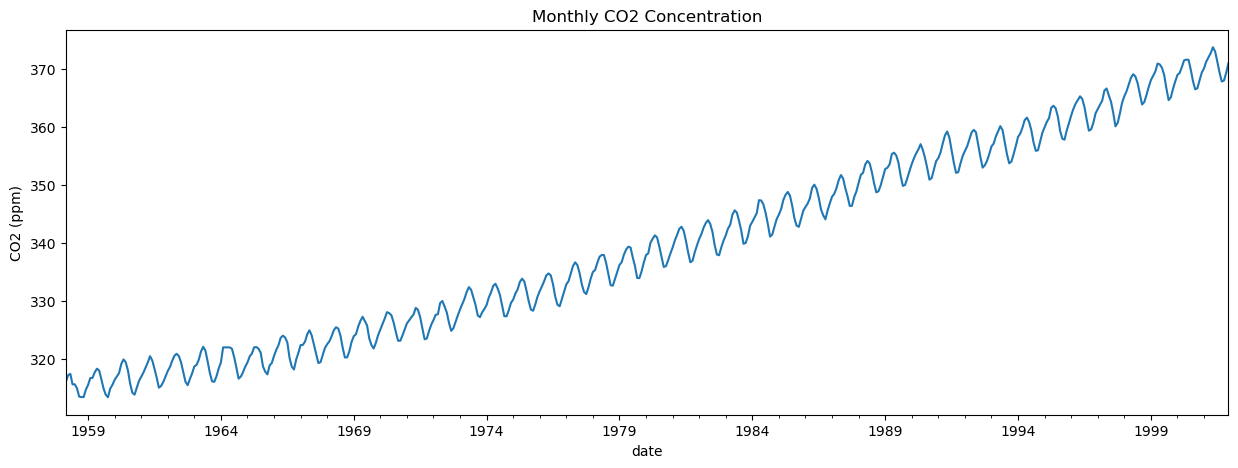

In [7]:
# Plot the time series
CO2_cleaned.plot(figsize=(15,5), title="Monthly CO2 Concentration", ylabel="CO2 (ppm)")
plt.show()


### Step 7: Creating a Time Series Dot Plot

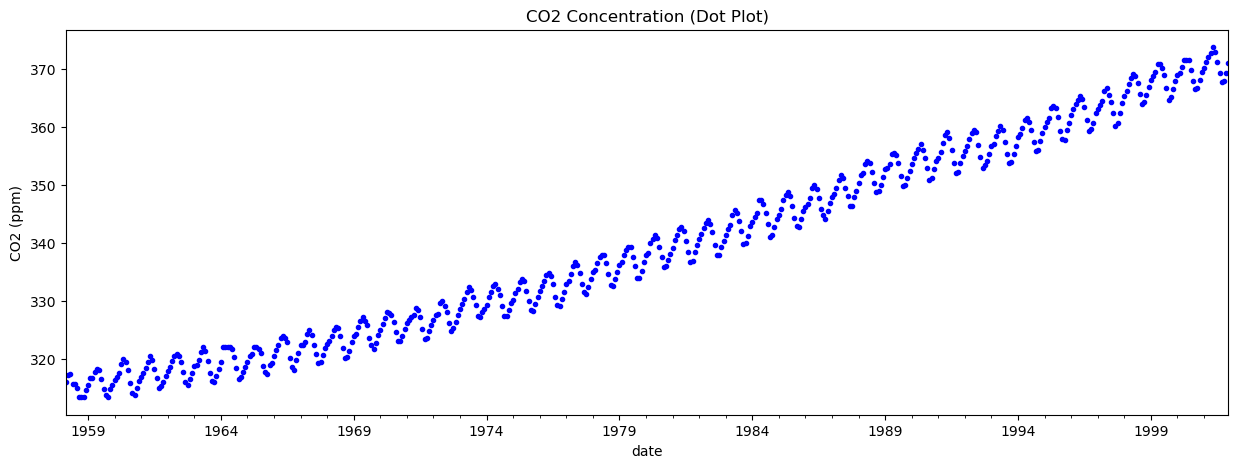

In [8]:
# Plot the time series using dots
CO2_cleaned.plot(figsize=(15,5), style='b.', title="CO2 Concentration (Dot Plot)", ylabel="CO2 (ppm)")
plt.show()


### Step 8: Grouping and Visualizing Time Series Data

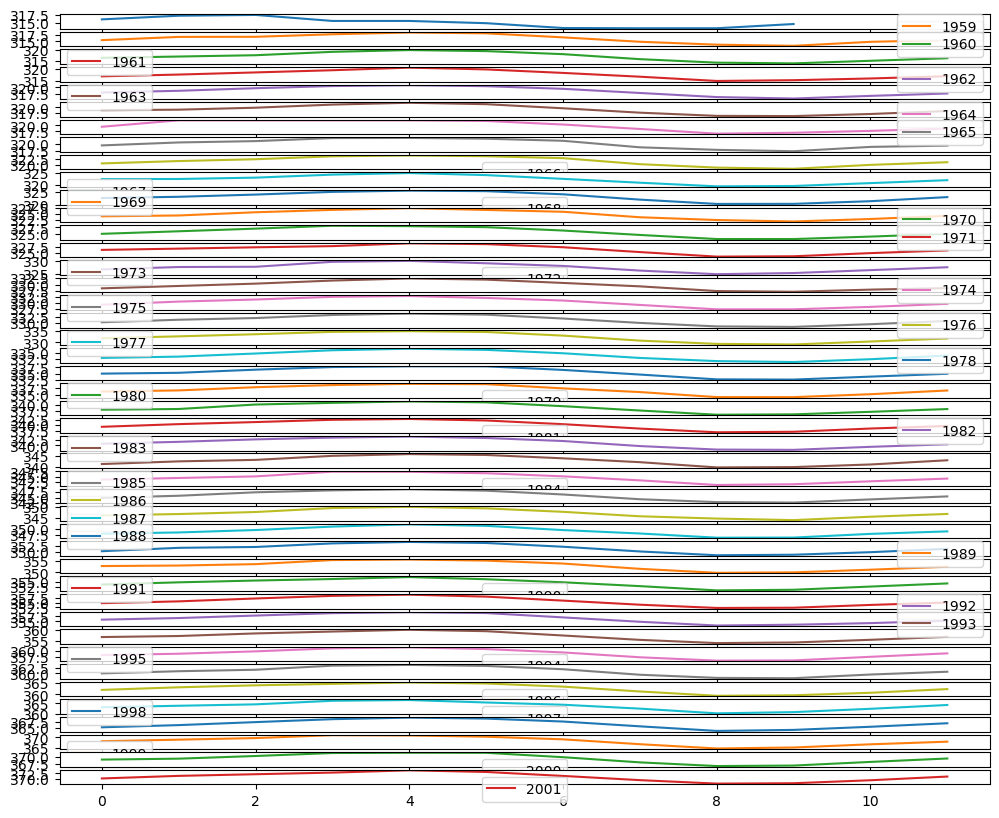

In [9]:
# Group by year
year_groups = CO2_cleaned.groupby(pd.Grouper(freq='A'))

# Create a DataFrame to store yearly values
CO2_annual = pd.DataFrame()

for yr, group in year_groups:
    # Ensure CO2_annual has enough rows to accommodate the data
    if len(CO2_annual) < len(group):
        CO2_annual = CO2_annual.reindex(range(len(group))) # Reindex to the correct size
    CO2_annual[yr.year] = group.values.ravel()[:len(CO2_annual)] # Assign values, truncating if necessary

# Plot each year as a separate subplot
CO2_annual.plot(figsize=(12,10), subplots=True, legend=True)
plt.show()


### Step 9: Time Series Histogram

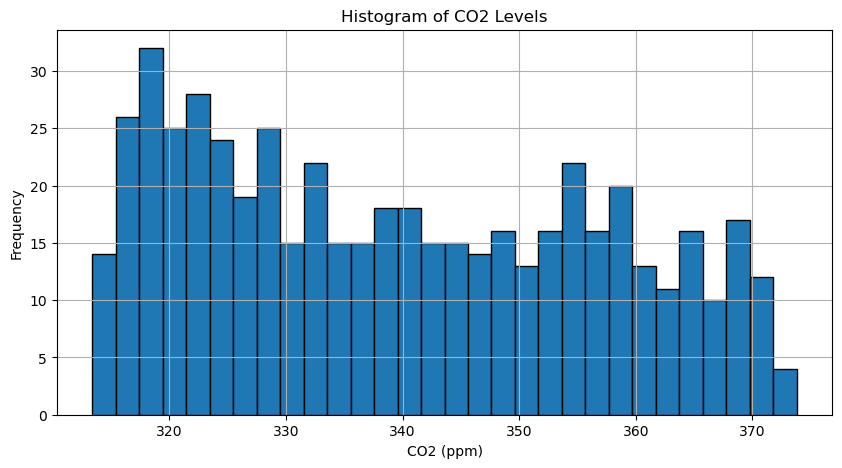

In [10]:
# Create a histogram
CO2_cleaned.hist(figsize=(10,5), bins=30, edgecolor='black')
plt.title("Histogram of CO2 Levels")
plt.xlabel("CO2 (ppm)")
plt.ylabel("Frequency")
plt.show()


### Step 10: Time Series Density Plot

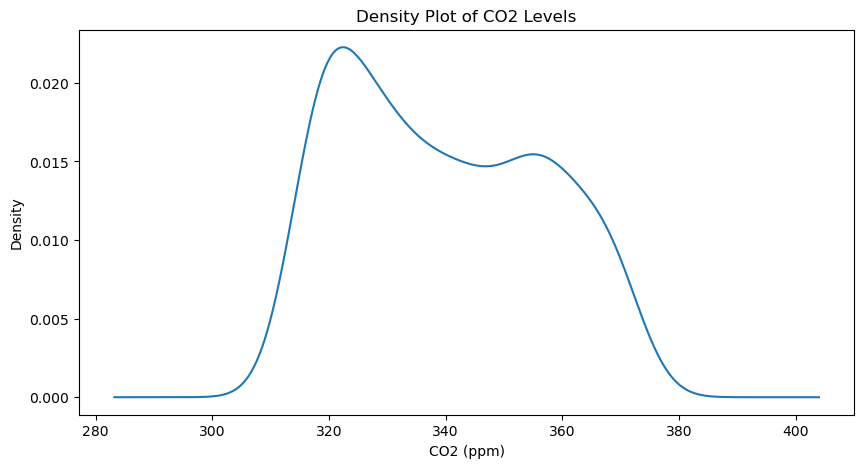

In [11]:
# Create a density plot
CO2_cleaned.plot(kind='kde', figsize=(10,5), title="Density Plot of CO2 Levels")
plt.xlabel("CO2 (ppm)")
plt.show()


### Step 11: Time Series Box and Whisker Plots

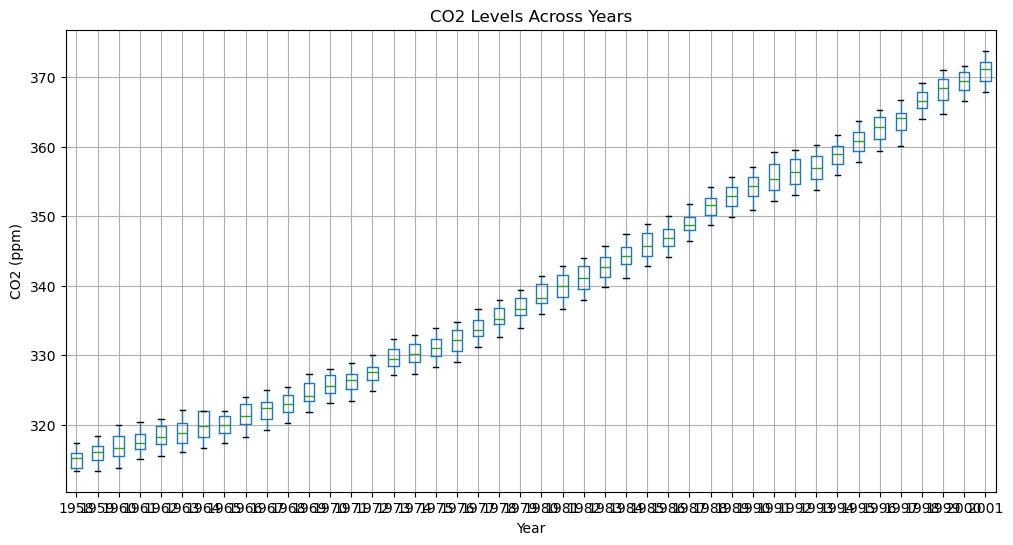

In [12]:
# Generate box plots for each year
CO2_annual.boxplot(figsize=(12,6))
plt.title("CO2 Levels Across Years")
plt.xlabel("Year")
plt.ylabel("CO2 (ppm)")
plt.show()


### Step 12: Creating a Time Series Heat Map

<Figure size 1000x600 with 0 Axes>

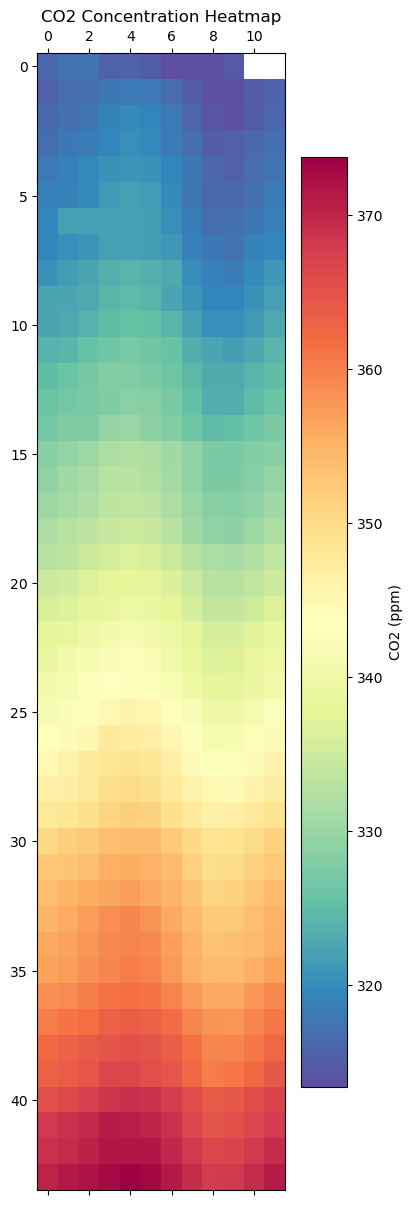

In [13]:
import numpy as np

# Transform data into a matrix format
CO2_matrix = CO2_annual.T

# Generate a heatmap
plt.figure(figsize=(10,6))
plt.matshow(CO2_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.colorbar(label="CO2 (ppm)")
plt.title("CO2 Concentration Heatmap")
plt.show()
